# Calculating all distances within a selection

Here we calculate the distance of every atom to every other atom in a selection, and show how we can extend this to residues.

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.20.1

**Packages required:**
    
* MDAnalysis [[1, 2]](#References)
* MDAnalysisTests
   
**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)



In [86]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PDB_small
from MDAnalysis.analysis import distances

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. [[3]](#References)

In [89]:
u = mda.Universe(PDB_small)

## Calculating atom-wise distances

We begin by selecting the alpha-carbons of the protein.

In [90]:
ca = u.select_atoms('name CA')
n_ca = len(ca)
n_ca

214

When given an array with $n$ positions, `distances.self_distance_array` returns the distances in a flat vector with length $\frac{n(n-1)}{2}$. These correspond to the flattened upper triangular values of a square distance matrix.

In [91]:
self_distances = distances.self_distance_array(ca.positions)
self_distances.shape

(22791,)

We can convert this into a more easily interpreted square distance array. First we create an all-zero square array and get the indices of the upper and lower triangular matrices.

In [92]:
sq_dist_arr = np.zeros((n_ca, n_ca))
triu = np.triu_indices_from(sq_dist_arr, k=1)

Then we simply assign the calculated distances to the upper and lower triangular positions.

In [93]:
sq_dist_arr[triu] = self_distances
sq_dist_arr.T[triu] = self_distances

### Plotting

Text(0, 0.5, 'Distance (Angstrom)')

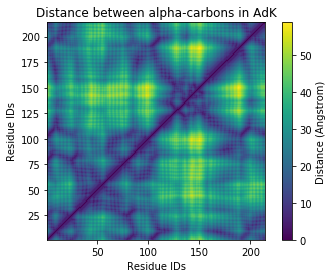

In [94]:
fig, ax = plt.subplots()
im = ax.pcolor(ca.resids, ca.resids, sq_dist_arr)

# plt.pcolor gives a rectangular grid by default
# so we need to make our heatmap square
ax.set_aspect('equal')

# add figure labels and titles
plt.ylabel('Residue IDs')
plt.xlabel('Residue IDs')
plt.title('Distance between alpha-carbons in AdK')

# colorbar
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance (Angstrom)')

## Calculating distances for each residue

Instead of calculating the distance between the alpha-carbon of each residue, we could look at the distances between the centers-of-mass instead. The process is very similar to the atom-wise distances above, but we have to pass `distances.self_distance_array` an array of residue center-of-mass coordinates instead.

In [95]:
res_com = u.atoms.center_of_mass(compound='residues')
n_res = len(res_com)
n_res

214

As the number of residues remains the same, the resulting distances array has the same length.

In [97]:
res_dist = distances.self_distance_array(res_com)
res_dist.shape

(22791,)

This means we don't need to re-define `triu`.

In [98]:
sq_dist_res = np.zeros((n_res, n_res))
sq_dist_res[triu] = res_dist
sq_dist_res.T[triu] = res_dist

### Plotting

The resulting plot looks pretty similar.

Text(0, 0.5, 'Distance (Angstrom)')

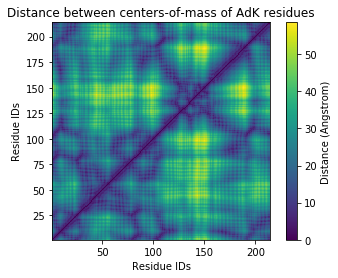

In [102]:
fig2, ax2 = plt.subplots()
im2 = ax2.pcolor(u.residues.resids, u.residues.resids, sq_dist_res)

# plt.pcolor gives a rectangular grid by default
# so we need to make our heatmap square
ax2.set_aspect('equal')

# add figure labels and titles
plt.ylabel('Residue IDs')
plt.xlabel('Residue IDs')
plt.title('Distance between centers-of-mass of AdK residues')

# colorbar
cbar2 = fig2.colorbar(im2)
cbar2.ax.set_ylabel('Distance (Angstrom)')

## References

[1]: R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. [MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations](http://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html). In S. Benthall and S. Rostrup, editors, *Proceedings of the 15th Python in Science Conference*, pages 98-105, Austin, TX, 2016. SciPy, [doi:10.25080/majora-629e541a-00e](https://doi.org/10.25080/majora-629e541a-00e).

[2]: N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. *J. Comput. Chem*. 32 (2011), 2319-2327, doi:[10.1002/jcc.21787](https://dx.doi.org/10.1002/jcc.21787). PMCID:[PMC3144279](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144279/)

[3]: Beckstein O, Denning EJ, Perilla JR, Woolf TB. Zipping and unzipping of adenylate kinase: atomistic insights into the ensemble of open<-->closed transitions. *J Mol Biol*. 2009;394(1):160–176. [doi:10.1016/j.jmb.2009.09.009](https://dx.doi.org/10.1016%2Fj.jmb.2009.09.009)